<a href="https://colab.research.google.com/github/labudzki/ComputationalBiology/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from matplotlib.pyplot import *
import pandas as pd
import scipy.optimize as sp
import math

Question 1: Experimental data from an enzyme kinetics experiment is provided in Kinetics.csv file.
The file contains two substrate (S1 and S2) concentrations (in mM) and corresponding rates (in mM/s). (5 points)
1. Identify the underlying enzyme kinetics mechanism
Hint: Use Chi-squared/R-squared measures
2. Make (a) Eadie-Hofstee and (b) Lineweaver-Burk plots for different S2 values of 1.5, 2.5 and 5 mM
3. Extract Michaelis constants (Km1, Km2) and Vmax from the Eadie-Hofstee plot

In [92]:
data = pd.read_csv('Kinetics.csv')
# data

data_filtered = data[data['S2'] <= 1]
data_filtered

# data_filtered = data.iloc[1:,:] #remove first column
# data_filtered = data_filtered[['S1','Rate','S2']].dropna() #remove any NaNs
# data_filtered

s1_data = data_filtered.iloc[:,0]
rate_data = data_filtered.iloc[:,1]
s2_data = data_filtered.iloc[:,2]

# k=1
# s1s2 = k*s1_data * s2_data

# s1s2 = s1s2[100:]
# rate_data = rate_data[100:]

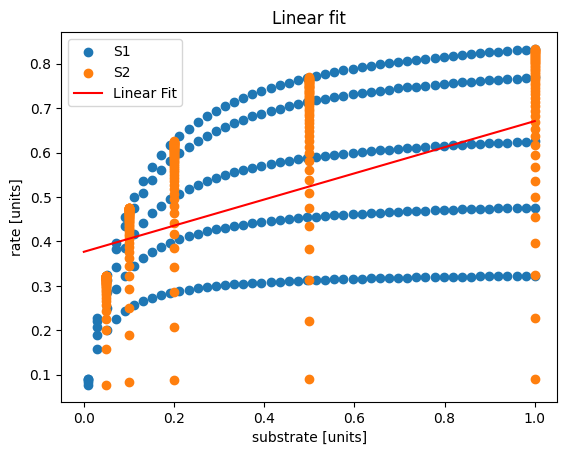

In [103]:
# Fitting a linear function - clearly not a good fit

def linear(x, a, b):
    return a * x + b

# Fit Linear Function
params_linear, _ = sp.curve_fit(linear, s1_data, rate_data)
a_fit, b_fit = params_linear

x_fit = np.linspace(0, 1, 10)

# figure()
# scatter(x, y, label='Data points')  # Use scatter for points
# plot(x_fit, linear(x_fit, *params_linear), color='red', label='Linear Fit')
# legend()
# xlabel('x [units]')
# ylabel('y [units]')
# title('Linear Fit')
# show()

figure()
scatter(s1_data, rate_data, label='S1')
scatter(s2_data, rate_data, label='S2')
# plot(x_fit, linear(x_fit, *params_linear), color='red', label='Linear Fit')
legend()
xlabel('substrate [units]')
ylabel('rate [units]')
title('Linear fit')
show()

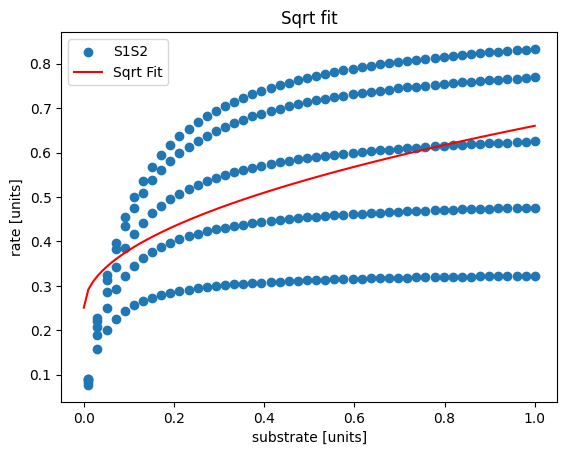

In [108]:
def sqrt_func(x, a, b):
    return a * np.sqrt(x) + b

# Fit Sqrt Function
params_sqrt, _ = sp.curve_fit(sqrt_func, s1_data, rate_data)
a_fit, b_fit, = params_sqrt

x_fit = np.linspace(0, 1, 100)

figure()
scatter(s1_data, rate_data, label='S1S2')
plot(x_fit, sqrt_func(x_fit, *params_sqrt), color='red', label='Sqrt Fit')
legend()
xlabel('substrate [units]')
ylabel('rate [units]')
title('Sqrt fit')
show()

In [114]:
def type_1(x, y, K1, K2, v_max):
    S1 = x
    S2 = y
    v = (v_max * S1 * S2) / (K1 * K2 + K2 * S1 + K1 * S2 + S1 * S2)
    return v

def type_2(x, y, K1, K2, v_max):
    S1 = x
    S2 = y
    v = (v_max * S1 * S2) / (K2 * S1 + K1 * S2 + S1 * S2)
    return v

#%% Goodness of Fit Metrics
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

def chi_squared(y, y_fit):
    return np.sum(((y - y_fit) ** 2) / y_fit)

# Convert the data to numpy arrays
s1_data = data.iloc[:, 0].to_numpy()
s2_data = data.iloc[:, 2].to_numpy()
rate_data = data.iloc[:, 1].to_numpy()

# Stack S1 and S2 into a 2D array
data_input = np.column_stack((s1_data, s2_data))

# Type 1
params_1, _ = sp.curve_fit(lambda xy, K1, K2, v_max: type_1(xy[:, 0], xy[:, 1], K1, K2, v_max), data_input, rate_data)
K1_fit, K2_fit, v_max_fit = params_1

# Generate fitted values
x_fit = np.linspace(min(s1_data), max(s1_data), 100)
y_fit = np.linspace(min(s2_data), max(s2_data), 100)

# Type 2
params_2, _ = sp.curve_fit(lambda xy, K1, K2, v_max: type_2(xy[:, 0], xy[:, 1], K1, K2, v_max), data_input, rate_data)
K1_fit_2, K2_fit_2, v_max_fit_2 = params_1

# Generate fitted values
x_fit_2 = np.linspace(min(s1_data), max(s1_data), 100)
y_fit_2 = np.linspace(min(s2_data), max(s2_data), 100)

# Calculate goodness of fit metrics
r2_1 = r_squared(rate_data, y_fit)
chi2_1 = chi_squared(rate_data, y_fit)
r2_2 = r_squared(rate_data, y_fit_2)
chi2_2 = chi_squared(rate_data, y_fit_2)

# Print the metrics
print(f"Type 1: R-squared: {r2}")
print(f"Chi-squared: {chi2}")
print(f"Type 2: R-squared: {r2}")
print(f"Chi-squared: {chi2}")

# # Create a meshgrid for plotting
# X_fit, Y_fit = np.meshgrid(x_fit, y_fit)
# Z_fit = type_1(X_fit, Y_fit, K1_fit, K2_fit, v_max_fit)

# # Plot the original data and the fit
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot the scatter data
# ax.scatter(s1_data, s2_data, rate_data, label='Data')

# # Plot the fitted surface
# ax.plot_surface(X_fit, Y_fit, Z_fit, color='r', alpha=0.5, label='Fit')

# # Labels and title
# ax.set_xlabel('S1 [units]')
# ax.set_ylabel('S2 [units]')
# ax.set_zlabel('Rate [units]')
# ax.set_title('Fitting type_1 Function')

# plt.legend()
# plt.show()


ValueError: operands could not be broadcast together with shapes (300,) (100,) 